# Question 2:
* Which problems can be solved quickly but have not been solved?
* Can you pinpoint the reason why? 
* Note: Only for Bangkok

# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import json

# Functions

In [211]:
import numpy as np
def makeList(x):
    if isinstance(x,list):
        return x
    elif isinstance(x,str):
        return x.split(',')
    else: return np.nan

# the_df.type = the_df.type.apply(makelist)
# the_df = the_df.explode('type')

In [212]:
import requests
def reverse_geocode(lat, lng, api_key):
    # Base URL for the API
    url = "https://maps.googleapis.com/maps/api/geocode/json"
    
    # Parameters for the request
    params = {
        "latlng": f"{lat},{lng}",
        "key": api_key
    }
    
    # Make the GET request
    response = requests.get(url, params=params)
    
    # Parse the JSON response
    if response.status_code == 200:
        data = response.json()
        if data.get('results'):
            return data['results'][0]['formatted_address']
        else:
            return "No address found for the given coordinates."
    else:
        return f"Error: {response.status_code}, {response.text}"

# Example usage
latitude = 100.48093
longitude = 13.75001
your_api_key = "YOUR_API_KEY"
address = reverse_geocode(latitude, longitude, your_api_key)
print(f"Address: {address}")

Address: Error: 400, {
   "error_message" : "Invalid request. Invalid 'latlng' parameter.",
   "results" : [],
   "status" : "INVALID_REQUEST"
}


In [213]:
import requests
def get_location_from_coordinates(lat, lon):
    url = f"https://nominatim.openstreetmap.org/reverse"
    params = {
        'lat': lat,
        'lon': lon,
        'format': 'json',
    }
    response = requests.get(url, params=params)
    
    if response.status_code == 200:
        data = response.json()
        address = data.get("address", {})
        region = address.get("state", "Region not found")
        province = address.get("county", "Province not found")
        return region, province
    else:
        return None, None

# Example usage
latitude = 100.5018
longitude = 13.7563
region, province = get_location_from_coordinates(latitude, longitude)
print(f"Region: {region}, Province: {province}")


Region: None, Province: None


In [214]:
import geopy
from geopy.geocoders import Nominatim 
import ssl
import certifi
from geopy.adapters import AioHTTPAdapter
from geopy.geocoders import options
def get_location_with_geopy(lat, lon):
    ctx = ssl.create_default_context(cafile=certifi.where())
    geopy.geocoders.options.default_ssl_context = ctx   
    geolocator = Nominatim(user_agent="geoapi")
    location = geolocator.reverse((lat, lon), language="en")
    if location and location.raw.get("address"):
        address = location.raw["address"]
        region = address.get("state", "Region not found")
        province = address.get("county", "Province not found")
        return region, province
    return None, None

# Example usage
latitude = 13.7563
longitude = 100.5018 
region, province = get_location_with_geopy(latitude, longitude)
print(f"Region: {region}, Province: {province}")

Region: Region not found, Province: Province not found


# Bangkok Metropolis districts and subdistricts

### Combined_Cases_And_Logs.csv with only Bangkok

In [3]:
combined_df = pd.read_csv('Combined_Cases_And_Logs.csv')

In [4]:
combined_df.head()

ticket_id            type  \
0  2024-ANZFC6  แท็กซี่/รถเมล์   
1  2024-ZCBDC7       ความสะอาด   
2  2024-LMV2YC      ผิดกฎจราจร   
3       MPA9A3           เสียง   
4  2024-H4HK7T    หาบเร่แผงลอย   

                                 organization_action  \
0  สน.ทองหล่อ, เขตคลองเตย, สำนักงานตำรวจแห่งชาติ ...   
1  ฝ่ายรักษาความสะอาดฯ เขตสัมพันธวงศ์, เขตสัมพันธ...   
2  สน.ทองหล่อ, เขตคลองเตย, สำนักงานตำรวจแห่งชาติ ...   
3  ฝ่ายปกครอง เขตธนบุรี, เขตธนบุรี, กรุงเทพมหานคร...   
4   ฝ่ายเทศกิจ เขตจตุจักร, เขตจตุจักร, กรุงเทพมหานคร   

                                             comment              coords  \
0  รถติดหนักมากๆ นั่งอยู่บนรถเมล์สาย 48 สุขภาพจิต...  100.57357,13.72769   
1  เรื่องขยะที่มาแยกขยะที่ถนนเยาวราช ก่อนถึงปากซอ...   100.5059,13.74345   
2             จอดกึดขวางเหมือนเดิมทุกวัน ทุกเวลาครับ  100.56348,13.73007   
3  ปัญหา: บริเวณวัดกัลยาณ์ พบช่วงเทศกาลจะมีการจุด...  100.49133,13.74001   
4  บนสกายวอร์กหน้าห้างยูเนียนมอล์ ตั้งแผงกีดขวางค...   100.56074,13.8144   

                                             address  subdistrict  \
0  748 ถ. สุขุมวิท แขวงคลองตัน เขตคลองเตย กรุงเทพ...      คลองตัน   
1  222 ถ. เยาวราช แขวงจักรวรรดิ์ เขตสัมพันธวงศ์ ก...  สัมพันธวงศ์   
2  อาคาร Mille Malle ซอย สุขุมวิท 20 ถ. สุขุมวิท ...      คลองเตย   
3  371 ซอย วัดกัลยาณ์ แขวงวัดกัลยา เขตธนบุรี กรุง...   วัดกัลยาณ์   
4  30 ถนนพหลโยธิน แขวงจตุจักร เขตจตุจักร กรุงเทพม...      จตุจักร   

      district       province   state  star  count_reopen  \
0      คลองเตย  กรุงเทพมหานคร  finish   NaN           0.0   
1  สัมพันธวงศ์  กรุงเทพมหานคร  finish   NaN           0.0   
2      คลองเตย  กรุงเทพมหานคร  finish   5.0           0.0   
3       ธนบุรี  กรุงเทพมหานคร  finish   NaN           0.0   
4      จตุจักร  กรุงเทพมหานคร  finish   NaN           0.0   

         last_activity  view_count   timestamp_reported     timestamp_finish  \
0  2024-12-11 19:38:45        14.0  2024-12-11 19:09:27  2024-12-11 19:39:27   
1  2024-12-11 18:57:33         0.0  2024-12-11 16:36:10  2024-12-11 18:58:10   
2  2024-12-11 16:11:09         7.0  2024-12-11 15:52:44  2024-12-11 16:11:44   
3  2024-12-11 16:16:37         0.0  2024-12-11 15:50:52  2024-12-11 16:16:52   
4  2024-12-11 19:15:26         2.0  2024-12-11 15:16:16  2024-12-11 19:16:16   

          duration  
0  0 days 00:30:00  
1  0 days 02:22:00  
2  0 days 00:19:00  
3  0 days 00:26:00  
4  0 days 04:00:00

In [5]:
print(combined_df.shape)
print(combined_df[combined_df['province'] == 'กรุงเทพมหานคร'].shape)

(624278, 17)
(624020, 17)


In [6]:
combined_df_bkk = combined_df[combined_df['province'] == 'กรุงเทพมหานคร']

In [7]:
combined_df_bkk.to_csv('Combined_Cases_And_Logs_Bangkok.csv', index=False)

### Bangkok Districts Heatmap

In [8]:
combined_df_bkk['district'].value_counts().reset_index()

district  count
0             จตุจักร  32457
1              ประเวศ  22490
2               บางแค  19724
3             คลองเตย  19668
4               วัฒนา  19508
5             บางกะปิ  18613
6              บางเขน  18433
7           ลาดกระบัง  16948
8             ปทุมวัน  16742
9              พระนคร  15144
10         บางกอกน้อย  15023
11            ราชเทวี  14869
12        บางขุนเทียน  14747
13             ดินแดง  14542
14            สวนหลวง  14541
15             บางรัก  14400
16            บึงกุ่ม  14286
17            บางซื่อ  14111
18               สาทร  13129
19          คลองสามวา  13120
20             ธนบุรี  13000
21           ลาดพร้าว  12548
22           ห้วยขวาง  12315
23         วังทองหลาง  12288
24             สายไหม  11611
25              พญาไท  11603
26              บางนา  11446
27            มีนบุรี  11226
28            หนองจอก  11180
29            หลักสี่  10987
30          ภาษีเจริญ  10866
31            บางพลัด  10259
32  ป้อมปราบศัตรูพ่าย  10021
33            หนองแขม   9799
34            ยานนาวา   9730
35           สะพานสูง   9597
36           ตลิ่งชัน   9552
37            พระโขนง   9508
38          บางคอแหลม   9212
39             จอมทอง   8915
40           ดอนเมือง   8649
41              ดุสิต   7437
42            ทุ่งครุ   7358
43            คลองสาน   7151
44             บางบอน   7141
45           คันนายาว   6733
46           ทวีวัฒนา   6492
47        ราษฎร์บูรณะ   5666
48         บางกอกใหญ่   5200
49        สัมพันธวงศ์   4030
50            ลำลูกกา      2
51            สามพราน      1
52       เมืองนนทบุรี      1
53     เมืองสมุทรสาคร      1

In [9]:
heatmap_bkk_districts = combined_df_bkk['district'].value_counts().reset_index()

Since some districts have too few cases, they will be dropped.

In [10]:
heatmap_bkk_districts.loc[heatmap_bkk_districts['count'] < 30, 'count'] = None

In [11]:
heatmap_bkk_districts.dropna(subset=['count'], inplace=True)

In [12]:
display(heatmap_bkk_districts)

district    count
0             จตุจักร  32457.0
1              ประเวศ  22490.0
2               บางแค  19724.0
3             คลองเตย  19668.0
4               วัฒนา  19508.0
5             บางกะปิ  18613.0
6              บางเขน  18433.0
7           ลาดกระบัง  16948.0
8             ปทุมวัน  16742.0
9              พระนคร  15144.0
10         บางกอกน้อย  15023.0
11            ราชเทวี  14869.0
12        บางขุนเทียน  14747.0
13             ดินแดง  14542.0
14            สวนหลวง  14541.0
15             บางรัก  14400.0
16            บึงกุ่ม  14286.0
17            บางซื่อ  14111.0
18               สาทร  13129.0
19          คลองสามวา  13120.0
20             ธนบุรี  13000.0
21           ลาดพร้าว  12548.0
22           ห้วยขวาง  12315.0
23         วังทองหลาง  12288.0
24             สายไหม  11611.0
25              พญาไท  11603.0
26              บางนา  11446.0
27            มีนบุรี  11226.0
28            หนองจอก  11180.0
29            หลักสี่  10987.0
30          ภาษีเจริญ  10866.0
31            บางพลัด  10259.0
32  ป้อมปราบศัตรูพ่าย  10021.0
33            หนองแขม   9799.0
34            ยานนาวา   9730.0
35           สะพานสูง   9597.0
36           ตลิ่งชัน   9552.0
37            พระโขนง   9508.0
38          บางคอแหลม   9212.0
39             จอมทอง   8915.0
40           ดอนเมือง   8649.0
41              ดุสิต   7437.0
42            ทุ่งครุ   7358.0
43            คลองสาน   7151.0
44             บางบอน   7141.0
45           คันนายาว   6733.0
46           ทวีวัฒนา   6492.0
47        ราษฎร์บูรณะ   5666.0
48         บางกอกใหญ่   5200.0
49        สัมพันธวงศ์   4030.0

In [13]:
heatmap_bkk_districts[heatmap_bkk_districts['district'] == 'บางพลัด']

district    count
31  บางพลัด  10259.0

In [14]:
bangkok_districts = json.load(open('Bangkok-districts.geojson', 'r'))

In [15]:
bangkok_districts.keys()

dict_keys(['type', 'bbox', 'features'])

In [16]:
bangkok_districts['features'][0]['properties']

{'OBJECTID': 29,
 'water': 918,
 'AREA': 11804564.0,
 'dcode': '1025',
 'dname': 'เขตบางพลัด',
 'dname_e': 'Bang Phlat',
 'pcode': '10',
 'no_female': 53750,
 'pname': 'กรุงเทพมหานคร',
 'no_male': 46569,
 'no_health': 1,
 'no_temple': 23,
 'no_commu': 46,
 'no_hos': 0,
 'no_sch': 11}

In [17]:
bangkok_districts['features'][0]['properties']['dname']

'เขตบางพลัด'

Since the thai names do not match exactly, some processing is required.

In [18]:
len(bangkok_districts['features'])

50

In [19]:
thai_bkk_districts = [i['properties']['dname'] for i in bangkok_districts['features']]

In [20]:
print(thai_bkk_districts)

['เขตบางพลัด', 'เขตห้วยขวาง', 'เขตวังทองหลาง', 'เขตทวีวัฒนา', 'เขตลาดกระบัง', 'เขตดินแดง', 'เขตตลิ่งชัน', 'เขตดุสิต', 'เขตสะพานสูง', 'เขตพญาไท', 'เขตบางกอกน้อย', 'เขตราชเทวี', 'เขตพระนคร', 'เขตป้อมปราบศัตรูพ่าย', 'เขตปทุมวัน', 'เขตบางแค', 'เขตสวนหลวง', 'เขตวัฒนา', 'เขตบางกอกใหญ่', 'เขตภาษีเจริญ', 'เขตสัมพันธวงศ์', 'เขตคลองเตย', 'เขตธนบุรี', 'เขตคลองสาน', 'เขตประเวศ', 'เขตบางรัก', 'เขตหนองแขม', 'เขตสาทร', 'เขตยานนาวา', 'เขตจอมทอง', 'เขตบางคอแหลม', 'เขตพระโขนง', 'เขตราษฏร์บูรณะ', 'เขตบางบอน', 'เขตบางนา', 'เขตบางขุนเทียน', 'เขตดอนเมือง', 'เขตหนองจอก', 'เขตสายไหม', 'เขตคลองสามวา', 'เขตหลักสี่', 'เขตบางเขน', 'เขตจตุจักร', 'เขตคันนายาว', 'เขตมีนบุรี', 'เขตลาดพร้าว', 'เขตบางซื่อ', 'เขตบึงกุ่ม', 'เขตบางกะปิ', 'เขตทุ่งครุ']


In [21]:
# temp_thai_bkk_districts = [i.replace('เขต', '') for i in thai_bkk_districts]
temp_thai_bkk_districts = []
for i in bangkok_districts['features']:
    j = i['properties']['dname']
    j = j.replace('เขต', '')
    temp_thai_bkk_districts.append(j)
    i['properties']['district_name'] = j


In [22]:
thai_bkk_districts = temp_thai_bkk_districts

In [23]:
print(thai_bkk_districts)

['บางพลัด', 'ห้วยขวาง', 'วังทองหลาง', 'ทวีวัฒนา', 'ลาดกระบัง', 'ดินแดง', 'ตลิ่งชัน', 'ดุสิต', 'สะพานสูง', 'พญาไท', 'บางกอกน้อย', 'ราชเทวี', 'พระนคร', 'ป้อมปราบศัตรูพ่าย', 'ปทุมวัน', 'บางแค', 'สวนหลวง', 'วัฒนา', 'บางกอกใหญ่', 'ภาษีเจริญ', 'สัมพันธวงศ์', 'คลองเตย', 'ธนบุรี', 'คลองสาน', 'ประเวศ', 'บางรัก', 'หนองแขม', 'สาทร', 'ยานนาวา', 'จอมทอง', 'บางคอแหลม', 'พระโขนง', 'ราษฏร์บูรณะ', 'บางบอน', 'บางนา', 'บางขุนเทียน', 'ดอนเมือง', 'หนองจอก', 'สายไหม', 'คลองสามวา', 'หลักสี่', 'บางเขน', 'จตุจักร', 'คันนายาว', 'มีนบุรี', 'ลาดพร้าว', 'บางซื่อ', 'บึงกุ่ม', 'บางกะปิ', 'ทุ่งครุ']


In [24]:
eng_bkk_districts = [i['properties']['dname_e'] for i in bangkok_districts['features']]

In [25]:
print(eng_bkk_districts)

['Bang Phlat', 'Huai Khwang', 'Wang Thong Lang', 'Thawi Watthana', 'Lat Krabang', 'Din Daeng', 'Taling Chan', 'Dusit', 'Saphan Sung', 'Phaya Thai', 'Bangkok Noi', 'Ratchathewi', 'Phra Nakhon', 'Pom Prap Sattru Phai', 'Parthum Wan', 'Bang Khae', 'Suanluang', 'Vadhana', 'Bangkok Yai', 'Phasi Charoen', 'Samphanthawong', 'Khlong Toei', 'Thon buri', 'Khlong San', 'Pra Wet', 'Bang Rak', 'Nong Khaem', 'Sathon', 'Yan na wa', 'Chom Thong', 'Bang Kho laen', 'Phra Khanong', 'Rat Burana', 'Bang Bon', 'Bang Na', 'Bang Khun thain', 'Don Mueang', 'Nong Chok', 'Sai Mai', 'Khlong Sam Wa', 'Lak Si', 'Bang Khen', 'Chatu Chak', 'Khan Na Yao', 'Min Buri', 'Lat Phrao', 'Bang Sue', 'Bueng Kum', 'Bang Kapi', 'Thung khru']


In [26]:
import plotly.express as px
import plotly.io as pio

pio.renderers.default = 'notebook'

# fig = px.choropleth(heatmap_bkk_districts, locations='district', geojson=bangkok_districts, color='count', scope='asia', featureidkey='properties.district_name')
# fig.update_geos(fitbounds='locations', visible=False)
# fig.show()

In [27]:
# pio.write_image(fig, 'heatmap_bkk_districts.png')

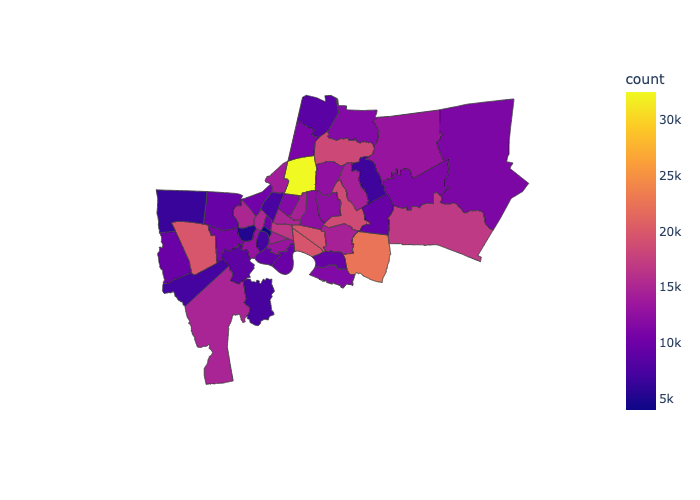

In [28]:
from PIL import Image
Image.open('heatmap_bkk_districts.png')

In [29]:
heatmap_bkk_districts.to_csv('heatmap_bkk_districts.csv', index=False)

In [30]:
with open('bangkok-districts-processed.geojson', 'w') as outfile:
    json.dump(bangkok_districts, outfile)

### Bangkok Subdistricts Heatmap

In [31]:
combined_df_bkk['subdistrict'].value_counts().reset_index()

subdistrict  count
0       สวนหลวง  14539
1        ดินแดง  14538
2      สามเสนใน  10938
3        ประเวศ  10748
4    อนุสาวรีย์  10583
..          ...    ...
180  กระทุ่มล้ม      1
181      บางเขน      1
182   บางน้ำจืด      1
183     ลาดสวาย      1
184      บางบอน      1

[185 rows x 2 columns]

In [32]:
heatmap_bkk_subdistricts = combined_df_bkk['subdistrict'].value_counts().reset_index()

Since some subdistricts have too few cases, they will be dropped.

In [33]:
heatmap_bkk_subdistricts.loc[heatmap_bkk_subdistricts['count'] < 30, 'count'] = None

In [34]:
heatmap_bkk_subdistricts.dropna(subset=['count'], inplace=True)

In [35]:
heatmap_bkk_subdistricts

subdistrict    count
0        สวนหลวง  14539.0
1         ดินแดง  14538.0
2       สามเสนใน  10938.0
3         ประเวศ  10748.0
4     อนุสาวรีย์  10583.0
..           ...      ...
170      คลองสิบ    567.0
171   คลองสิบสอง    564.0
172  วัดสามพระยา    549.0
173   คูหาสวรรค์    503.0
174   พระโขนงใต้    260.0

[175 rows x 2 columns]

In [36]:
heatmap_bkk_subdistricts.to_csv('heatmap_bkk_subdistrict_initially.csv', index=False)

In [37]:
heatmap_bkk_subdistricts[heatmap_bkk_subdistricts['subdistrict'] == 'ท่าแร้ง']

subdistrict   count
15     ท่าแร้ง  7850.0

In [38]:
bangkok_subdistricts = json.load(open('Bangkok-subdistricts.geojson', 'r'))

In [39]:
bangkok_subdistricts

{'type': 'FeatureCollection',
 'bbox': [100.32618858582285,
  13.494275421396848,
  100.9396540372169,
  13.95198557556592],
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[100.65315747051689, 13.886333922064837],
      [100.65321141630957, 13.886275935119128],
      [100.65327171364113, 13.886216775340468],
      [100.65332519238034, 13.886174609310405],
      [100.65338205233886, 13.886119992136132],
      [100.65342570117605, 13.88607789261338],
      [100.65348686505632, 13.886059402106543],
      [100.65354029427532, 13.886091804971354],
      [100.65356902801237, 13.886148103441588],
      [100.65359487062176, 13.886204420571747],
      [100.65367639264572, 13.886202738024389],
      [100.6537340159756, 13.886174102852406],
      [100.65378289283377, 13.88613535740482],
      [100.65383118343496, 13.886095486076892],
      [100.65382603675096, 13.886022081264368],
      [100.65378807446271, 13.885969234822015],
      [100.6537714122802, 

In [40]:
bangkok_subdistricts.keys()

dict_keys(['type', 'bbox', 'features'])

In [41]:
bangkok_subdistricts['features'][0]['properties']

{'PNAME': 'กรุงเทพมหานคร',
 'SUBDIST_ID': 64,
 'DCODE': '1005',
 'AREA_': 22922521.274935,
 'SUB_CODE': '0508',
 'PERIMETER': 24078.875,
 'DNAME': 'เขตบางเขน',
 'OBJECTID': 52.0,
 'SNAME': 'แขวงท่าแร้ง',
 'SCODE': '100508',
 'SCODE_BMA': '100502',
 'PCODE': '10',
 'SUBDIST_': 65,
 'water': 3007}

In [42]:
bangkok_subdistricts['features'][0]['properties']['SNAME']

'แขวงท่าแร้ง'

In [43]:
thai_bkk_subdistricts = []
for i in bangkok_subdistricts['features']:
    j = i['properties']['SNAME']
    j = j.replace('แขวง', '')
    thai_bkk_subdistricts.append(j)
    i['properties']['subdistrict_name'] = j

In [44]:
thai_bkk_subdistricts

['ท่าแร้ง',
 'ทรายกองดินใต้',
 'ทรายกองดิน',
 'มักกะสัน',
 'ตลาดยอด',
 'บ้านช่างหล่อ',
 'พระบรมมหาราชวัง',
 'ทุ่งพญาไท',
 'วัดสามพระยา',
 'บ้านพานถม',
 'ถนนพญาไท',
 'ชนะสงคราม',
 'ศิริราช',
 'บางกะปิ',
 'วัดโสมนัส',
 'สามวาตะวันตก',
 'คลองถนน',
 'ออเงิน',
 'ทุ่งสองห้อง',
 'หนองจอก',
 'อนุสาวรีย์',
 'คู้ฝั่งเหนือ',
 'ตลาดบางเขน',
 'บางขุนพรหม',
 'บวรนิเวศ',
 'บางพรม',
 'บางเชือกหนัง',
 'บางชัน',
 'ถนนเพชรบุรี',
 'กระทุ่มราย',
 'โคกแฝด',
 'ลาดยาว',
 'เสนานิคม',
 'รามอินทรา',
 'แสนแสบ',
 'จรเข้บัว',
 'วงศ์สว่าง',
 'คลองสิบ',
 'ดอนเมือง',
 'วัดอรุณ',
 'ป้อมปราบ',
 'คลองขวาง',
 'คลองตันเหนือ',
 'สัมพันธวงศ์',
 'สะพานสอง',
 'ศาลาธรรมสพน์',
 'ลำปลาทิว',
 'ดินแดง',
 'คลองเจ้าคุณสิงห์',
 'ฉิมพลี',
 'วัดท่าพระ',
 'ลำผักชี',
 'จอมพล',
 'นวมินทร์',
 'ลำต้อยติ่ง',
 'บางซื่อ',
 'สมเด็จเจ้าพระยา',
 'ประเวศ',
 'มหาพฤฒาราม',
 'สี่แยกมหานาค',
 'สนามบิน',
 'สีกัน',
 'คลองสิบสอง',
 'สายไหม',
 'สวนจิตรลดา',
 'หัวหมาก',
 'ทับยาว',
 'บางขุนศรี',
 'ขุมทอง',
 'สี่พระยา',
 'ลาดกระบัง',
 'บางรัก',
 'บางแคเหนือ',

In [45]:
len(thai_bkk_subdistricts)

169

#### Dealing with missing subdistricts.

In [46]:
for i in heatmap_bkk_subdistricts['subdistrict'].to_list():
    if i not in thai_bkk_subdistricts:
        print(i)

บางนาเหนือ
ช่องนนทรี
บางนาใต้
อรุณอมรินทร์
คลองบางพราน
คลองบางบอน
บางบอนเหนือ
บางบอนใต้
ทับช้าง
จักรวรรดิ
ราษฎร์พัฒนา
พญาไท
พระโขนงใต้


##### Bangna

In [47]:
if 'บางนา' in thai_bkk_subdistricts:
    print('yes')

yes


In [48]:
heatmap_bkk_subdistricts[heatmap_bkk_subdistricts['subdistrict'] == 'บางนา']

Empty DataFrame
Columns: [subdistrict, count]
Index: []

In [49]:
bangna_north = heatmap_bkk_subdistricts[heatmap_bkk_subdistricts['subdistrict'] == 'บางนาเหนือ']['count'].values[0]
bangna_south = heatmap_bkk_subdistricts[heatmap_bkk_subdistricts['subdistrict'] == 'บางนาใต้']['count'].values[0]

heatmap_bkk_subdistricts.loc[heatmap_bkk_subdistricts['subdistrict'] == 'บางนาเหนือ', 'subdistrict'] = 'บางนา'
heatmap_bkk_subdistricts.loc[heatmap_bkk_subdistricts['subdistrict'] == 'บางนาใต้', 'subdistrict'] = None
heatmap_bkk_subdistricts.dropna(subset=['subdistrict'], inplace=True)

heatmap_bkk_subdistricts.loc[heatmap_bkk_subdistricts['subdistrict'] == 'บางนา', 'count'] = bangna_north + bangna_south

In [50]:
heatmap_bkk_subdistricts[heatmap_bkk_subdistricts['subdistrict'] == 'บางนา']

subdistrict    count
24       บางนา  11439.0

##### Prakanong

In [51]:
if 'พระโขนง' in thai_bkk_subdistricts:
    print('yes')

yes


In [52]:
if 'พระโขนงเหนือ' in thai_bkk_subdistricts:
    print('yes')

yes


In [53]:
heatmap_bkk_subdistricts[heatmap_bkk_subdistricts['subdistrict'] == 'พระโขนง']

subdistrict   count
30     พระโขนง  6026.0

In [54]:
heatmap_bkk_subdistricts[heatmap_bkk_subdistricts['subdistrict'] == 'พระโขนงเหนือ']

subdistrict   count
58  พระโขนงเหนือ  4104.0

In [55]:
heatmap_bkk_subdistricts[heatmap_bkk_subdistricts['subdistrict'] == 'พระโขนงใต้']

subdistrict  count
174  พระโขนงใต้  260.0

In [56]:
prakanong_south = heatmap_bkk_subdistricts[heatmap_bkk_subdistricts['subdistrict'] == 'พระโขนงใต้']['count'].values[0]

In [57]:
heatmap_bkk_subdistricts.loc[heatmap_bkk_subdistricts['subdistrict'] == 'พระโขนง', 'count'] += prakanong_south

In [58]:
heatmap_bkk_subdistricts[heatmap_bkk_subdistricts['subdistrict'] == 'พระโขนง']

subdistrict   count
30     พระโขนง  6286.0

In [59]:
heatmap_bkk_subdistricts.loc[heatmap_bkk_subdistricts['subdistrict'] == 'พระโขนงใต้', 'subdistrict'] = None
heatmap_bkk_subdistricts.dropna(subset=['subdistrict'], inplace=True)

In [60]:
heatmap_bkk_subdistricts[heatmap_bkk_subdistricts['subdistrict'] == 'พระโขนงใต้']

Empty DataFrame
Columns: [subdistrict, count]
Index: []

##### Bangbon

In [61]:
if 'บางบอน' in thai_bkk_subdistricts:
    print('yes')

yes


In [62]:
if 'บางบอนเหนือ' in thai_bkk_subdistricts:
    print('yes')

In [63]:
heatmap_bkk_subdistricts[heatmap_bkk_subdistricts['subdistrict'] == 'บางบอน']

Empty DataFrame
Columns: [subdistrict, count]
Index: []

In [64]:
heatmap_bkk_subdistricts[heatmap_bkk_subdistricts['subdistrict'] == 'บางบอนเหนือ']

subdistrict   count
122  บางบอนเหนือ  1828.0

In [65]:
heatmap_bkk_subdistricts[heatmap_bkk_subdistricts['subdistrict'] == 'บางบอนใต้']

subdistrict   count
134   บางบอนใต้  1464.0

In [66]:
heatmap_bkk_subdistricts[heatmap_bkk_subdistricts['subdistrict'] == 'คลองบางบอน']

subdistrict   count
118  คลองบางบอน  1865.0

In [67]:
heatmap_bkk_subdistricts.loc[heatmap_bkk_subdistricts['subdistrict'] == 'บางบอนใต้', 'subdistrict'] = 'บางบอน'

In [68]:
Bangbon_north = heatmap_bkk_subdistricts[heatmap_bkk_subdistricts['subdistrict'] == 'บางบอนเหนือ']['count'].values[0]
heatmap_bkk_subdistricts.loc[heatmap_bkk_subdistricts['subdistrict'] == 'บางบอนเหนือ', 'subdistrict'] = None
heatmap_bkk_subdistricts.dropna(subset=['subdistrict'], inplace=True)

In [69]:
Bangbon_canal = heatmap_bkk_subdistricts[heatmap_bkk_subdistricts['subdistrict'] == 'คลองบางบอน']['count'].values[0]
heatmap_bkk_subdistricts.loc[heatmap_bkk_subdistricts['subdistrict'] == 'คลองบางบอน', 'subdistrict'] = None
heatmap_bkk_subdistricts.dropna(subset=['subdistrict'], inplace=True)

In [70]:
heatmap_bkk_subdistricts.loc[heatmap_bkk_subdistricts['subdistrict'] == 'บางบอน', 'count'] += Bangbon_north
heatmap_bkk_subdistricts.loc[heatmap_bkk_subdistricts['subdistrict'] == 'บางบอน', 'count'] += Bangbon_canal

In [71]:
heatmap_bkk_subdistricts[heatmap_bkk_subdistricts['subdistrict'] == 'บางบอน']

subdistrict   count
134      บางบอน  5157.0

##### Not exist in geojson

So, these subdistricts neither exist in the geojson, nor do they have anything similar in the heatmap DataFrame.

Hence, they will be left out of the heatmap automatically when plotting.

In [72]:
if 'บางพราน' in thai_bkk_subdistricts:
    print('yes')

In [73]:
for i in heatmap_bkk_subdistricts['subdistrict'].to_list():
    if i not in thai_bkk_subdistricts:
        print(i)

ช่องนนทรี
อรุณอมรินทร์
คลองบางพราน
ทับช้าง
จักรวรรดิ
ราษฎร์พัฒนา
พญาไท


##### Comparing number of subdistricts in geojson and DataFrame again

In [74]:
print(heatmap_bkk_subdistricts.shape)
print(len(thai_bkk_subdistricts))
# Note: there are around 7 subdistricts that do not match between the two.

(171, 2)
169


#### Heatmap

In [75]:
import plotly.express as px
import plotly.io as pio

pio.renderers.default = 'notebook'

# fig = px.choropleth(heatmap_bkk_subdistricts, locations='subdistrict', geojson=bangkok_subdistricts, color='count', scope='asia', featureidkey='properties.subdistrict_name')
# fig.update_geos(fitbounds='locations', visible=False)
# fig.show()

In [76]:
# pio.write_image(fig, 'heatmap_bkk_subdistricts.png')

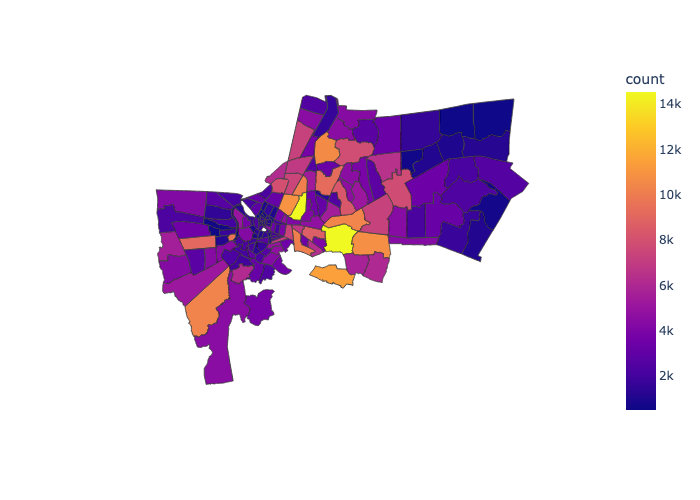

In [77]:
from PIL import Image
Image.open('heatmap_bkk_subdistricts.png')

In [78]:
heatmap_bkk_subdistricts.to_csv('heatmap_bkk_subdistricts.csv', index=False)

In [79]:
with open('bangkok-subdistricts-processed.geojson', 'w') as outfile:
    json.dump(bangkok_subdistricts, outfile)